In [1]:
# 1. Import the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# 3. First look at its main features (head, shape, info)
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

customer_df.rename(columns=lambda c: c.lower().replace(' ', '_'), inplace=True)
customer_df.rename(columns={'employmentstatus': 'employment_status'}, inplace=True)
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
# 5. Change effective to date column to datetime format

customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [9]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
# 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

for col_name in customer_df.columns:
    print(f'{col_name} | {customer_df[col_name].dtype} | {customer_df[col_name].nunique()}')

customer | object | 9134
state | object | 5
customer_lifetime_value | float64 | 8041
response | object | 2
coverage | object | 3
education | object | 5
effective_to_date | datetime64[ns] | 59
employment_status | object | 5
gender | object | 2
income | int64 | 5694
location_code | object | 3
marital_status | object | 3
monthly_premium_auto | int64 | 202
months_since_last_claim | int64 | 36
months_since_policy_inception | int64 | 100
number_of_open_complaints | int64 | 6
number_of_policies | int64 | 9
policy_type | object | 3
policy | object | 9
renew_offer_type | object | 4
sales_channel | object | 4
total_claim_amount | float64 | 5106
vehicle_class | object | 6
vehicle_size | object | 3


In [11]:
# Display number of unique values over total rows

for col_name in customer_df:
    print(f'{col_name} : {(customer_df[col_name].nunique() * 100) / len(customer_df)}%')

customer : 100.0%
state : 0.054740529888329316%
customer_lifetime_value : 88.03372016641121%
response : 0.02189621195533173%
coverage : 0.032844317932997594%
education : 0.054740529888329316%
effective_to_date : 0.645938252682286%
employment_status : 0.054740529888329316%
gender : 0.02189621195533173%
income : 62.338515436829425%
location_code : 0.032844317932997594%
marital_status : 0.032844317932997594%
monthly_premium_auto : 2.2115174074885044%
months_since_last_claim : 0.3941318151959711%
months_since_policy_inception : 1.0948105977665863%
number_of_open_complaints : 0.06568863586599519%
number_of_policies : 0.09853295379899278%
policy_type : 0.032844317932997594%
policy : 0.09853295379899278%
renew_offer_type : 0.04379242391066346%
sales_channel : 0.04379242391066346%
total_claim_amount : 55.9010291219619%
vehicle_class : 0.06568863586599519%
vehicle_size : 0.032844317932997594%


In [12]:
# Detect if variable is discrete or continuous

def is_continuous(dataframe, total_rows):
    if dataframe.dtype == float or dataframe.dtype == np.datetime64:
        return True
    if (dataframe.nunique() * 100) / total_rows > 2:
        return True
    return False


continuous_variables = []
discrete_variables = []

for col_name in customer_df.columns:
    if is_continuous(customer_df[col_name], len(customer_df[col_name])) == True:
        continuous_variables.append(col_name)
    else:
        discrete_variables.append(col_name)

print('Continuous variables:')
print(continuous_variables)
print('-----------------')
print('Discrete variables:')
print(discrete_variables)

Continuous variables:
['customer', 'customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']
-----------------
Discrete variables:
['state', 'response', 'coverage', 'education', 'effective_to_date', 'employment_status', 'gender', 'location_code', 'marital_status', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


<AxesSubplot:>

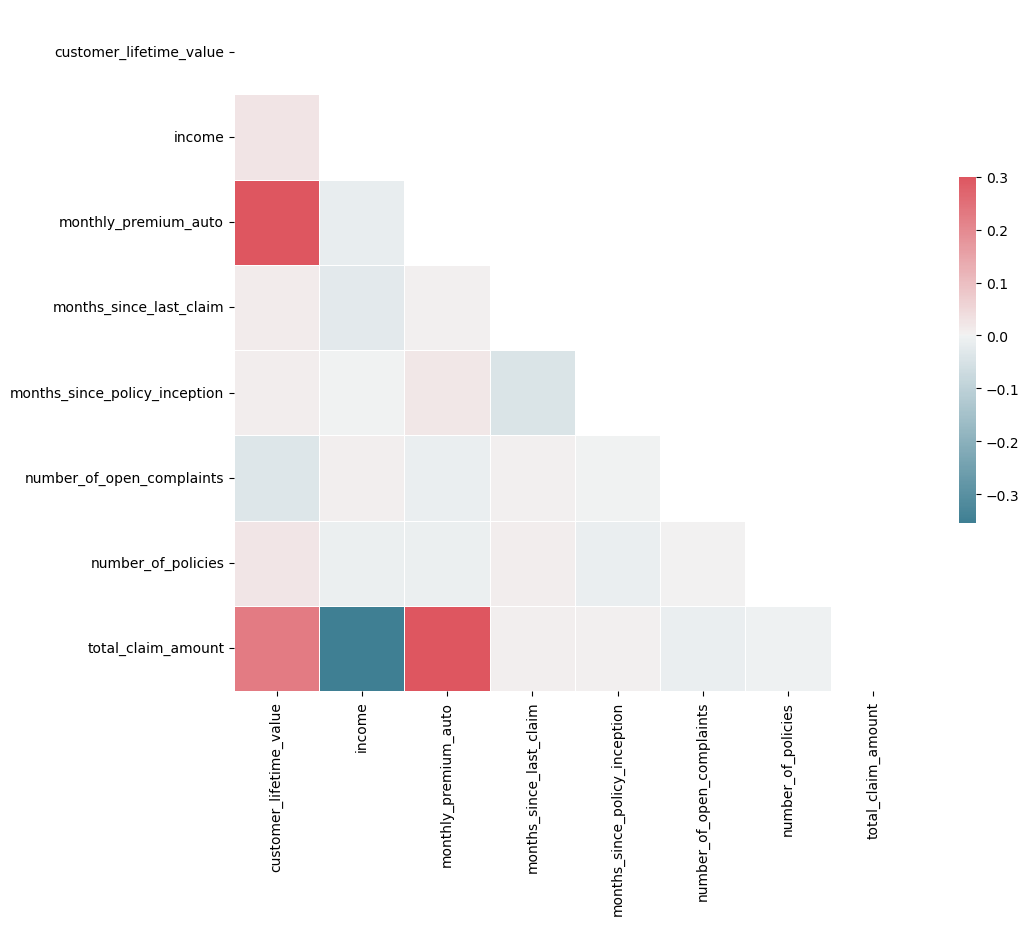

In [13]:
# 7. Plot a correlation matrix, comment what you see

corr=customer_df.corr()

mask=np.triu(np.ones_like(corr, dtype=bool))

f, ax=plt.subplots(figsize=(11, 9))

cmap=sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,
            vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
# total_claim_amount seems to be:
# - positively correlated with customer_lifetime_value as well as with months_since_last_claim
# - negatively correlated with income

# monthly_premium_auto seems positively correlated with customer_lifetime_value

months_since_last_claim


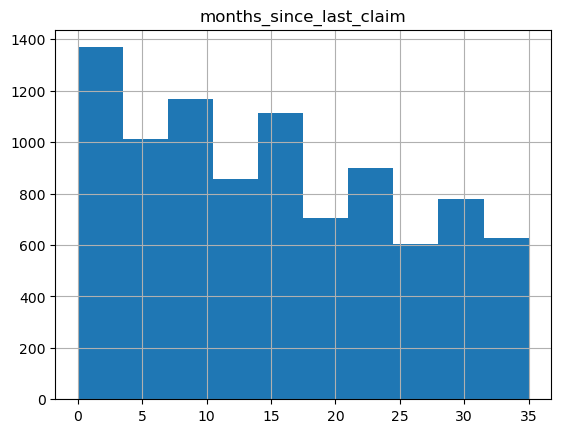

months_since_policy_inception


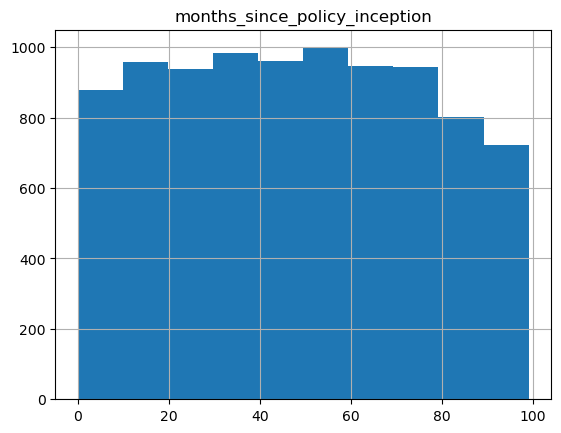

number_of_open_complaints


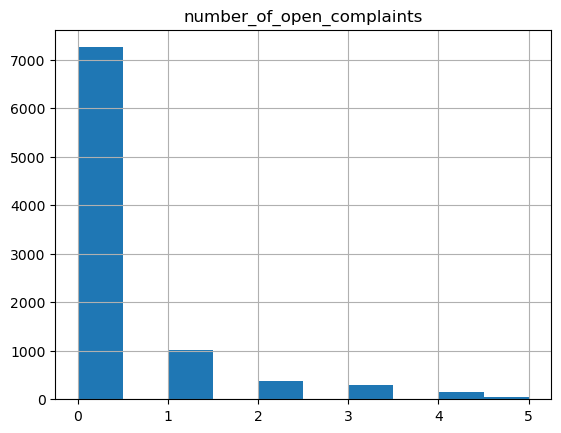

number_of_policies


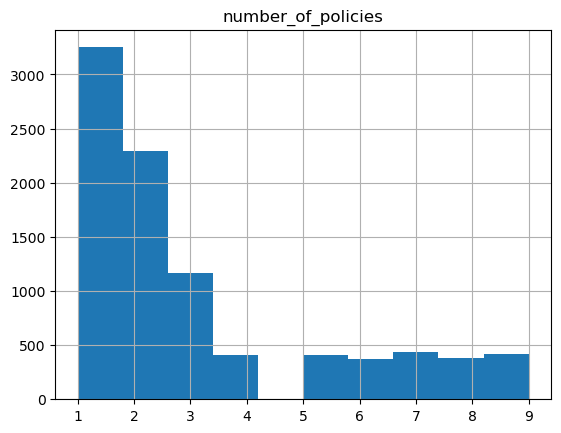

In [32]:
# 8. Create a function to plot every discrete variable.  Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

discrete_numerical_data = customer_df[discrete_variables].select_dtypes(include=np.number)

for col_name in discrete_numerical_data:
    customer_df.hist(column=col_name)
    plt.show()

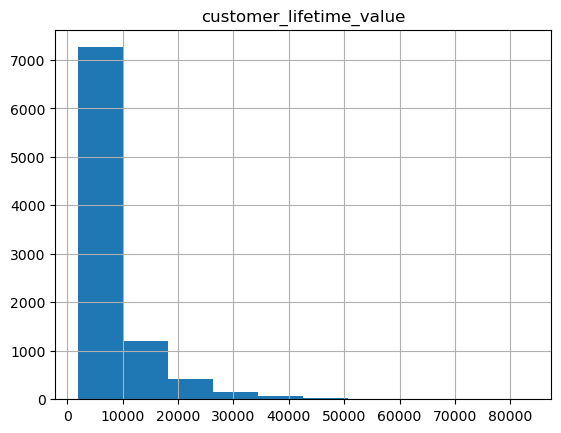

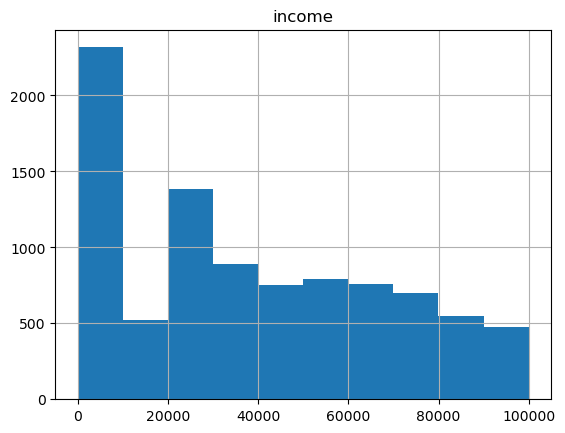

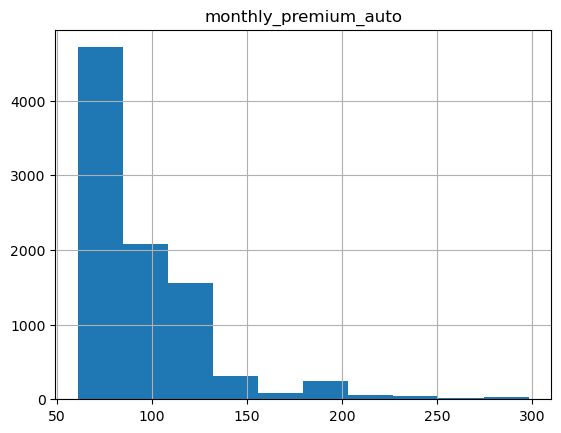

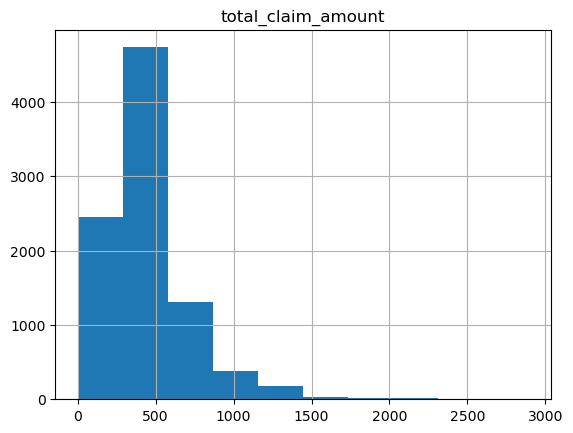

In [33]:
continuous_numerical_data = customer_df[continuous_variables].select_dtypes(include=np.number)

for col_name in continuous_numerical_data:
    customer_df.hist(bins=10, column=col_name)
    plt.show()

In [ ]:
# 9. Comment what you can see in the plots.

# Except for months_since_policy_inception, there is no normal distribution. Also, the higher values are, the less iterations

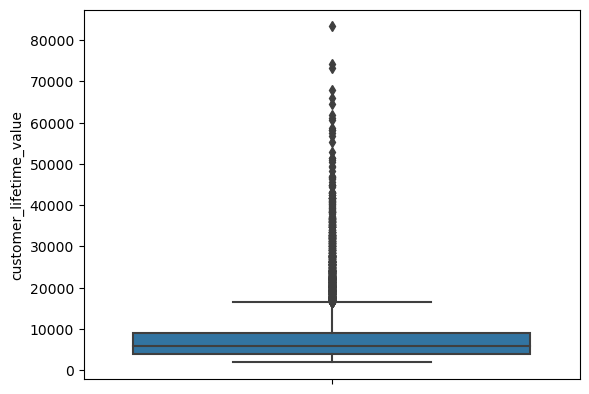

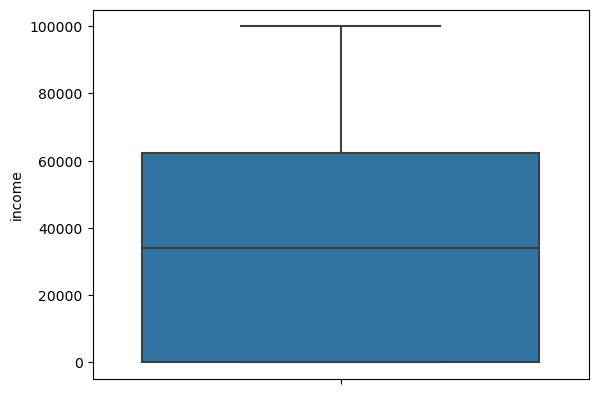

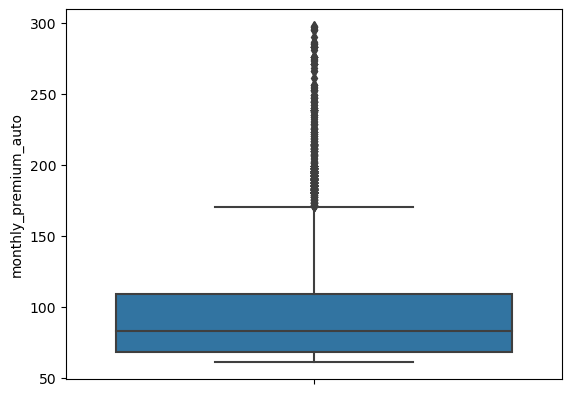

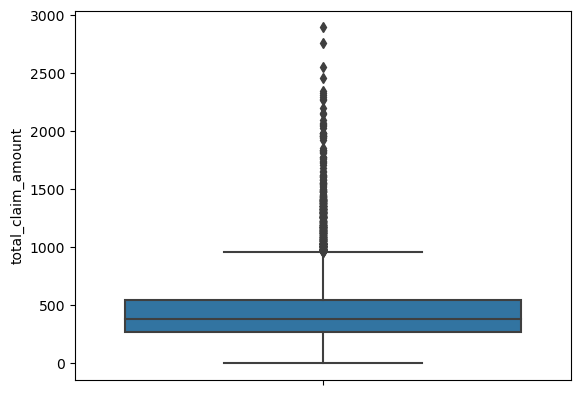

In [28]:
# 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

for col_name in continuous_numerical_data:
    sns.boxplot(y=customer_df[col_name])
    plt.show()

In [ ]:
# 11. Did you find outliers?  Comment what you will do with them.

# Income : 75% of person have an income lower than 60.000, without outliers
# customer_lifetime_value, monthly_premium_auto & total_claim_amount have important outliers

In [45]:
def select_outliers(dataframe, col_name):
    q1, q3 = np.percentile(sorted(dataframe[col_name]), [25, 75])
    diff = 1.5 * (q3 - q1)

    lower = q1 - diff
    upper = q3 + diff

    return dataframe[(dataframe[col_name] <= lower) | (dataframe[col_name] >= upper)]

In [48]:
for col_name in continuous_numerical_data:
    outliers = select_outliers(customer_df, col_name)
    print(f'Nb outliers for {col_name}: {len(outliers)}')

Nb outliers for customer_lifetime_value: 817
Nb outliers for income: 0
Nb outliers for monthly_premium_auto: 430
Nb outliers for total_claim_amount: 453


In [29]:
# 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64